<a href="https://colab.research.google.com/github/nastya236/MIPT-Opt/blob/master/HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 1

Дедлайн по отправке - 02:00 18 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1 (7 pts)

__1.__ Скачайте с помощью кода, приведённого ниже, набор фотографий и нарисуйте какую-нибудь из них.

In [0]:
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()
import numpy as np

Shape of data = (400, 64, 64)


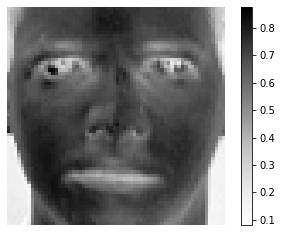

In [3]:
print("Shape of data = {}".format(data["images"].shape))
index = 0
plt.imshow(data["images"][index],  cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

__2.__ Одним из способов обработки изображений, например для выделения наиболее важных сегментов используется метод неотрицательной матричной факторизации ([Nonnegative matrix factorization](https://arxiv.org/pdf/1401.5226.pdf)). 
Идея в том, чтобы решить следующую задачу

\begin{align*}
& \min_{W, H} \frac12 \|X - WH\|^2_F \\
\text{s.t. } & W \geq 0\\
& H \geq 0,
\end{align*}

где знак $\geq$ означает покомпонентное сравнение. 
Также матрицы $W$ и $H$ малого ранга, то есть $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, где $k$ - параметр, который необходимо настраивать.
Чем больше $k$, тем точнее приближение, но и тем дольше будет решаться задача.
Матрица $X \in \mathbb{R}^{m \times n}$, где $m$ - это число фото в нашем наборе, а $n$ - это количество пикселей в каждой картинке, то есть каждая строка матрицы $X$ - это векторизованная картинка.

**Вопросы**

1) (1 pts) является ли эта задача выпуклой и почему?

2) (1 pts) как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная неотрицательность?

2) $X[j, :]$ - векторизованное представление изображения - набор пикселей.  Задача приблизить вектор $X[j, :]$ c помощью $W[j, :]\cdot H$, $(W[j, :].shape = (1, r)$. Получается, что матрица $H$ является неким базисом, набором картинок, с помощью линейной комбинации которых мы приближаем исходную картинку. Именно из-зи покомпонентной неотрицательности матриц мы можем интерпретировать их как базисную матрицу, набор картинок, по которым расскладываем ($H$) и матрицу весов ($W$). Важно еще и то, что все изображения в датасете - это лица людей. Поэтому мы можем найти такую матрицу $H$, такой набор или базис. Итог: матрица $H$ - некий "базис", матрица $W$  - веса.

1) Задача является выпуклой по каждой из факторов:

$\nabla_W^2 (\frac{1}{2} \|X - WH\|_F^2) ) = HH^T$,

$\nabla_H^2 (\frac{1}{2} \|X - WH\|_F^2) ) = W^TW$,

$\forall q \in R^m \hookrightarrow q^THH^Tq = (q^TH)(q^TH)^T \geq 0 \Rightarrow HH^T \succcurlyeq 0$. Аналогично $W^TW \succcurlyeq 0$.


__3.__ Такую задачу можно решать с помощью CVXPy, если воспользоваться идеей попеременной оптимизации (alternating optimization). Идея состоит в том, чтобы на чётных итерациях решить точно задачу относительно параметра $W$ при фиксированном параметре $H$, а на нечётных наоборот: использовать решение для $W$ с предыдущей итерации в качестве фиксированного параметра и найти решение задачи относительной $H$ и так далее до сходимости.
Сначала Вам нужно инициализировать матрицы $W$ и $H$ какими-нибудь матрицами с неотрицательными элементами. От инициализации будет сильно зависеть качество решения и скорость работы методов.

**Задачи**

1) (2 pts) реализуйте с помощью CVXPy идею попеременной оптимизации для этой задачи и решите её

2) (1 pts) нарисуйте график сходимости по функции и убедитесь, что метод сошёлся или же изменение целевой функции пренебрежимо мало

3) (1 pts) поскольку размерность $H$ - $k \times n$, то каждую строку $H$ можно преобразовать в картинку аналогично тому, как были собраны строки матрицы $X$. Нарисуйте 10-50 картинок полученных из строк матрицы $H$. Что Вы заметили и как это соотносится с ответами на вопрос 2) предыдущего пункта? Используйте ```plt.colorbar()``` и цветовую схему ```plt.cm.Greys``` для более чёткого отображения значений пикселей

4) (1 pts) Нарисуйте матрицу $W$ с помощью функции ```plt.imshow``` или ```plt.spy```. Насколько сильно она заполнена и почему?

In [0]:
import cvxpy as cp

In [0]:
X = data.data

In [21]:
error = []
k = 30
n = X.shape[1]
m = X.shape[0]
#W = X[:,:k]
W = np.random.rand(m,k)
#print(W)
H = np.random.rand(k,n)
num_iter = 100
for iter_num in range(num_iter):
    if iter_num % 2 == 0:
      if iter_num != 0:
        H = cp.Variable(shape=(k, n))
        H.value = H_
        constraint = [H >= 0]
      else:
        H = cp.Variable(shape=(k, n))
        constraint = [H >= 0]
    else:
      if iter_num != 1:

        W = cp.Variable(shape=(m, k))
        W.value = W_
        constraint = [W >= 0]
      else:
        W = cp.Variable(shape=(m, k))
        constraint = [W >= 0]

    obj = cp.Minimize(cp.norm(X - W*H, 'fro'))
    prob = cp.Problem(obj, constraint)
    prob.solve(solver=cp.SCS, max_iters=1000, verbose=True)
    print('Iteration {}, norm {}'.format(iter_num, prob.value))
    error.append(prob.value)

    if iter_num % 2 == 0:
        H = H.value
        H_ = H
    else:
        W = W.value
        W_ = W

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 49274881
eps = 1.00e-04, alpha = 1.50, max_iters = 1000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 122881, constraints m = 1761281
Cones:	linear vars: 122880
	soc vars: 1638401, soc blks: 1
Setup time: 9.65e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.04e+21  7.80e+20  1.00e+00 -1.94e+23  2.79e+23  2.69e+23  6.66e-01 
    40| 3.62e-06  3.64e-06  6.83e-07  1.83e+02  1.83e+02  3.52e-16  2.36e+01 
----------------------------------------------------------------------------
St

SolverError: ignored

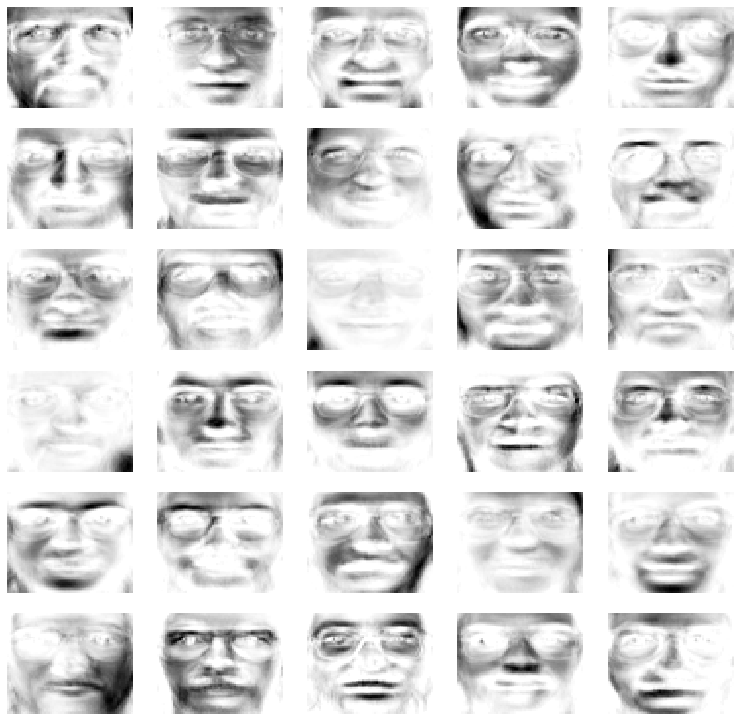

In [23]:
plt.rcParams['figure.figsize'] = (13.0, 13.0)
f, axarr = plt.subplots(6,5) 
H = H.reshape(6,5,64,64)
for i in range(6):
  for j in range(5):
    axarr[i, j].imshow(H[i,j,:,:], cmap=plt.cm.Greys, aspect = 'auto')
    _ = axarr[i, j].axis("off")

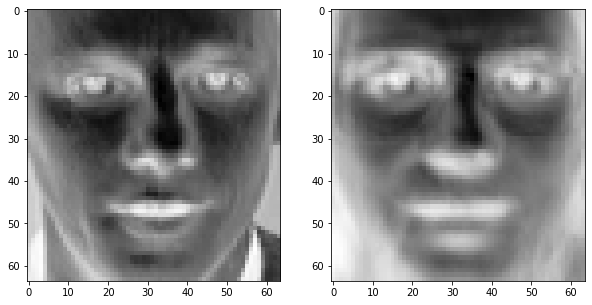

In [53]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(X[203].reshape(64,64), cmap=plt.cm.Greys, aspect = 'auto')
axarr[1].imshow(np.dot(W.value,H.reshape(30,64*64))[203].reshape(64,64), cmap=plt.cm.Greys, aspect = 'auto')

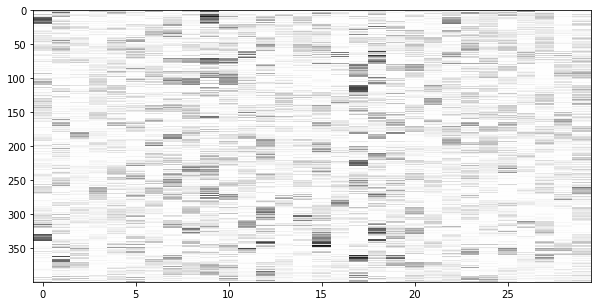

In [30]:
plt.imshow(W.value, cmap =plt.cm.Greys, aspect = 'auto')

Матрица $W$

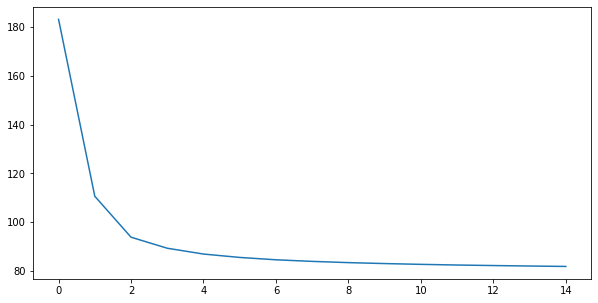

In [48]:
plt.plot(np.arange(len(error)), error)
plt.show()

## Задача 2 (14 pts)

### Управление посадкой космического корабля

В данной задаче вам предлагается поставить две задачи, связанные с посадкой ракеты.
Первая задача про то, как сэкономить топливо, вторая - про то как совершить посадку максимально быстро.
Про то, как идеи из этой задачи реализуются см. [тут](https://www.youtube.com/watch?v=2t15vP1PyoA)

В данной задаче предполагаем, что динамика челнока описывается вторым законом Ньютона

$$
mx''(t) = f(t) - mge_3,
$$

где $e_3$ - вектор $(0, 0, 1)$, $m$ - масса, предполагаем, что постоянная (отказ от этого предположения приводит к более сложной динамике), $f(t)$ - сила тяги, которую можно регулировать, $x''(t)$ - ускорение.
Также не учитываем влияние атмосферы.
Это уравнение векторное, то есть $x(t)$ и $f(t)$ - это трёхмерные векторы в каждый момент времени. 

#### Уравнения динамики получаем после дискретизации основного уравнения динамики

Для скорости получим

$$
m\frac{v_{k+1} - v_k}{h} = f_k - mge_3, \quad v_{k+1} = v_k + \frac{h}{m} f_k - hge_3
$$

аналогично для координат

$$
x' = v \quad x_{k+1} = x_k + \frac{h}{2}(v_k + v_{k+1})
$$

Схема дискретизации для связи координат и скорости получена с помощью [метода Рунге-Кутты 2-го порядка](http://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node5.html). Подробности будут на вычислительной математике. 

Точка посадки имеет координаты $(0, 0, 0)$ и для успешной посадки необходима нулевая скорость в момент посадки. Также в процессе посадки необходимо чтобы челнок не "сваливался", то есть значение координаты по высоте было больше своей проекции на плоскость $(x, y)$ в заданное число раз, то есть

$$
x_3(t) \geq \alpha \| (x_1(t), x_2(t)) \|_2.
$$

Поскольку сила тяги создаётся двигателем, который преобразует топливо, поэтому есть некоторая максимальная сила тяги, доступная кораблю, то есть

$$
\|f(t)\|_2 \leq F_{\max}.
$$

Также объём потребляемого топлива для развития силы $f(t)$ можно вычислить по формуле

$$
\gamma \int_0^T \|f(t)\|_2 dt,
$$

 где $\gamma$ - коэффициент потребления топлива, $T$ - время посадки. 
 
При дискретизации по времени можно считать, что $f(t)$ постоянно на каждом интервале $[(k-1)h; kh]$ для $k=1,\ldots,K$. Таким образом общее время посадки равно $Kh$. 

**Пункт 1**
Найти положение, скорость и силу тяги в каждый момент времени такие что общее потребление топлива минимально

1) (2 pts) Поставьте формально задачу оптимизации

2) (3 pts) Решите её с помощью CVXPy и визуализируйте решение

**Пункт 2**
Определить минимальное время за которое можно посадить челнок, то есть при фиксированном шаге дискретизации по времени $h$, нужно найти минимальное финальное время, за которое можно привести корабль в финальную точку с финальной скоростью.
Для решения этой задачи допускается решение нескольких вспомогательных задач.

3) (5 pts) Поставьте формально задачу оптимизации

4) (4 pts) Решите её с помощью CVXPy и визуализируйте решение. Сравните, полученную траекторию, с траекторией из пункта 1. 
Как сильно отсутствие требования по минимальности времени увеличивает объём потребления топлива?

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
import cvxpy as cvx

# Time discretiztion step
h = 1.
# Gravity acceleration. It is just demo value to scale the solution time!
g = 0.1
# Mass
m = 10.
# Maximum norm of forse
Fmax = 10.
# Initial position
p0 = np.array([50, 50, 100])
# Initial velocity
v0 = np.array([-10, 0, -10])
# Factor of minimum slope
alpha = 0.5
# Fuel consumption factor
gamma = 1.
# Number of discretization steps, i.e. final time equals K*h
K = 35

In [0]:
# Место для Вашего решения

In [0]:
# use the following code to plot your trajectories
# and the glide cone (don't modify)
# -------------------------------------------------------
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
#Have your solution be stored in p, which meana positions
# ax.plot(xs=p.value[0,:],ys=p.value[1,:],zs=p.value[2,:], c="red")
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.tight_layout()

## Задача 3 (11 pts)

### Регрессия на полных и неполных данных

Пусть вам дан набор измерений, состоящий из пар $(\mathbf{x}_i, y_i)$, где $y_i \in \mathbb{R}$, а $\mathbf{x}_i \in \mathbb{R}^n$.
Необходимо восстановить функцию, которая бы для других подобных измерений $\mathbf{x}$ предсказывала значения $y$.

1) (1 pts) Что необходимо задать для корректной постановки задачи поиска функции $f$?

2) (1 pts) Приведите 3 различных постановки и исследуйте их на выпуклость

In [0]:
# Место для вашего решения

Начнём изучение этой задачи с самой простой её постановки, а именно с предположения, что $y_i \approx \mathbf{w}^{\top}\mathbf{x}$, где вектор $\mathbf{w}$ нужно найти.
Использование в качестве функции ошибки квадрата евклидовой нормы остатков приводит нас к следующей задаче

$$
\min_{\mathbf{w}} \sum_{i=1}^m (y_i - \mathbf{w}^{\top}\mathbf{x}_i)^2
$$

Если переписать эту постановку в матрично-векторный вид, то получим следующее (классическую задачу наименьших квадратов, которую мы обсуждали в прошлом семестре)

$$
\min_{\mathbf{w}} \|\mathbf{y} - X\mathbf{w}\|_2
$$

Ниже приведём код для генерации случайного примера этой задачи, то есть задаются матрица $X$ и вектор $\mathbf{y}$.  

In [0]:
import numpy as np

m, n = 500, 20
np.random.seed(15)
X = np.random.randn(m, n)
w_exact = np.random.randn(n)
y = X @ w_exact + 0.1 * np.sqrt(n) * np.random.randn(m)

3) (1 pts) Ниже Вам нужно решить задачу с помощью CVXPy.

4) (2 pts) При этом проанализируйте, как изменится величина ошибки, если вместо евклидовой нормы использовать первую и Чебышёвскую. Сравните 3 числа и объясните результаты сравнения.

5) (1 pts) Сравните число итераций необходимое для решения каждой из трёх задач. Объясните, почему они так отличаются?

In [0]:
# Место для Вашего решения

Теперь рассмотрим следующую модификацию этой задачи.
Пусть только для $M$ измерений $\mathbf{x}_i$ известны точные значения $y_i$, для остальных $m - M$ измерений даны только оценки снизу на значения $y_i$.
То есть теперь часть значений $y_i$ также неизвестна.
Задача состоит в том, чтобы найти параметр $\mathbf{w}$ и значения $y_i$ для соответствующих измерений. 
Ниже приведён код для модификации ранее сгенерированных данных под новую задачу.

In [0]:
m_complete = int(0.25 * m)
print("Number of known pairs / total number of samples = {}/{}".format(m_complete, m))
y_sorted = np.sort(y)
y_idx_sorted = np.argsort(y)
X_sorted = X[y_idx_sorted, :]
random_perm_complete = np.random.permutation(np.arange(m_complete))
random_perm_incomplete = np.random.permutation(np.arange(m-m_complete))
X_complete = X_sorted[:m_complete, :][random_perm_complete, :]
X_incomplete = X_sorted[m_complete:, :][random_perm_incomplete, :]
y_complete = y_sorted[:m_complete][random_perm_complete]
y_lower_bound = 0.5 * (y_sorted[m_complete] + y_sorted[m_complete - 1])

6) (2 pts) поставьте задачу регрессии на неполных данных и проверьте её на выпуклость

7) (2 pts) решите её с помощью CVXPy или объясните, почему это сделать нельзя? Также решите эту же задачу с помощью функции [```minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) из пакета [```scipy.optimize```](https://docs.scipy.org/doc/scipy/reference/optimize.html). 
Обязательно задайте значения для параметра ```jac``` везде, где вы с ним столкнётесь. 
Иначе будет использована конечно-разностная аппроксимация, что может сильно испортить точность. Сравните время решения и точность решения. 

8) (1 pts) получите значение вектора $\mathbf{w}$, используя только $M$ измерений, для которых даны значения $y_i$, то есть воспользуйтесь результатом предыдущей части, используя только часть данных.
Сравните относительную ошибку полученных значений для $\mathbf{w}$ по сравнению с точным значением, которое можно взять из процедуры генерации данных. Какой метод даёт более точное значение?

In [0]:
# Место для Вашего решения